In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

In [ ]:
trader_df = pd.read_csv('/content/drive/MyDrive/ds_vyshnavi_sai_sri/csv_files/historical_data.csv')
sentiment_df = pd.read_csv('/content/drive/MyDrive/ds_vyshnavi_sai_sri/csv_files/fear_greed_index.csv')

In [ ]:
trader_df.rename(columns={
    'Account': 'account',
    'Coin': 'symbol',
    'Execution Price': 'execution_price',
    'Size Tokens': 'size_tokens',
    'Size USD': 'size',
    'Side': 'side',
    'Timestamp IST': 'timestamp',
    'Closed PnL': 'closedPnL',
    'Fee': 'fee',
    'Direction': 'direction'
}, inplace=True)

In [ ]:
trader_df['timestamp'] = pd.to_datetime(trader_df['timestamp'], dayfirst=True, errors='coerce')
trader_df = trader_df.dropna(subset=['timestamp'])
trader_df['date'] = trader_df['timestamp'].dt.date

# Sentiment data: fix timestamp format (epoch in float seconds)
sentiment_df['timestamp'] = pd.to_numeric(sentiment_df['timestamp'], errors='coerce')
sentiment_df['timestamp'] = pd.to_datetime(sentiment_df['timestamp'], unit='s', errors='coerce')
sentiment_df = sentiment_df.dropna(subset=['timestamp'])
sentiment_df['date'] = sentiment_df['timestamp'].dt.date
sentiment_df.rename(columns={'classification': 'Classification'}, inplace=True)

In [ ]:
merged_df = pd.merge(trader_df, sentiment_df[['date', 'Classification']], on='date', how='inner')
print("Merged rows:", len(merged_df))


Merged rows: 211218


In [ ]:
merged_df.to_csv('/content/drive/MyDrive/ds_vyshnavi_sai_sri/csv_files/merged_dataset.csv', index=False)

In [ ]:
print(" Sample Merged Data:")
print(merged_df[['account', 'symbol', 'side', 'direction', 'size', 'closedPnL', 'fee', 'Classification']].head())

 Sample Merged Data:
                                      account symbol side direction     size  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed   @107  BUY       Buy  7872.16   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed   @107  BUY       Buy   127.68   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed   @107  BUY       Buy  1150.63   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed   @107  BUY       Buy  1142.04   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed   @107  BUY       Buy    69.75   

   closedPnL       fee Classification  
0        0.0  0.345404  Extreme Greed  
1        0.0  0.005600  Extreme Greed  
2        0.0  0.050431  Extreme Greed  
3        0.0  0.050043  Extreme Greed  
4        0.0  0.003055  Extreme Greed  


In [21]:
sns.countplot(data=sentiment_df, x='Classification')
plt.title("Market Sentiment Distribution")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/ds_vyshnavi_sai_sri/Outputs')
plt.show()


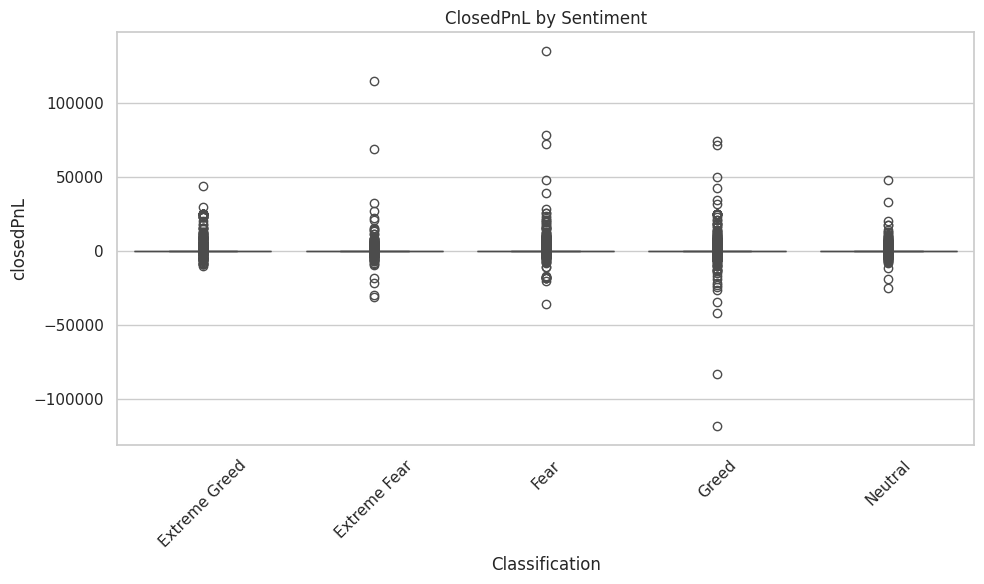

In [22]:
sns.boxplot(data=merged_df, x='Classification', y='closedPnL')
plt.title("ClosedPnL by Sentiment")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/ds_vyshnavi_sai_sri/Outputs2')
plt.show()

In [23]:
sns.histplot(data=merged_df, x='size', hue='Classification', bins=50, element='step')
plt.title("Trade Size Distribution by Sentiment")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/ds_vyshnavi_sai_sri/Outputs3')
plt.show()

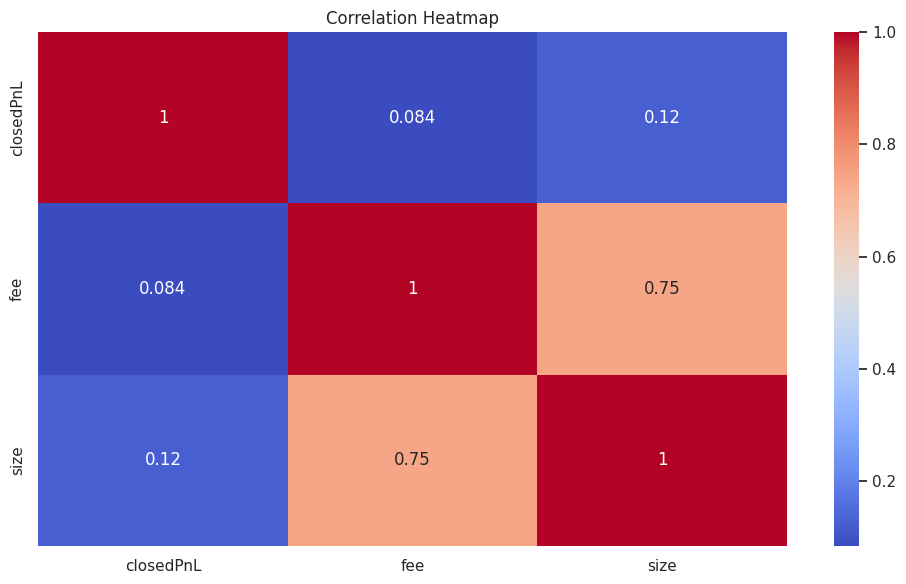

In [ ]:
corr_cols = ['closedPnL', 'fee', 'size']
sns.heatmap(merged_df[corr_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/ds_vyshnavi_sai_sri/outputs')
plt.show()

In [ ]:
print("\n Average ClosedPnL by Sentiment:")
print(merged_df.groupby('Classification')['closedPnL'].mean())

print("\n Average Fee by Sentiment:")
print(merged_df.groupby('Classification')['fee'].mean())

print("\n Number of Trades per Sentiment:")
print(merged_df['Classification'].value_counts())


 Average ClosedPnL by Sentiment:
Classification
Extreme Fear     34.537862
Extreme Greed    67.892861
Fear             54.290400
Greed            42.743559
Neutral          34.307718
Name: closedPnL, dtype: float64

 Average Fee by Sentiment:
Classification
Extreme Fear     1.116291
Extreme Greed    0.675902
Fear             1.495172
Greed            1.254372
Neutral          1.044798
Name: fee, dtype: float64

 Number of Trades per Sentiment:
Classification
Fear             61837
Greed            50303
Extreme Greed    39992
Neutral          37686
Extreme Fear     21400
Name: count, dtype: int64
